# Toronto Dwellings Analysis Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions to create a Panel dashboard.

In [42]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [43]:
# Initialize the Panel Extensions (for Plotly)
import panel as pn
pn.extension("plotly")

In [44]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("MAPBOX_API_KEY")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [45]:
# Import the CSVs to Pandas DataFrames
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")

file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

### Global available data

In [46]:
# Getting the data from the top 10 expensive neighbourhoods
house_values_sorted = to_data.groupby("neighbourhood").mean().sort_values("average_house_value", ascending=False)
house_values_sorted.reset_index(inplace=True)
top_10_df = house_values_sorted.iloc[0:10,:]

    # print to visualise data
print(top_10_df)

                       neighbourhood  single_detached_house  \
0  Bridle Path-Sunnybrook-York Mills                2260.00   
1                  Forest Hill South                1742.50   
2                Lawrence Park South                3472.50   
3                Rosedale-Moore Park                2498.75   
4               St.Andrew-Windfields                3225.00   
5                          Casa Loma                 916.25   
6               Bedford Park-Nortown                4865.00   
7                  Forest Hill North                1488.75   
8                     Kingsway South                2326.25   
9                     Yonge-St.Clair                 565.00   

   apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
0                       331.25              0.00                36.25   
1                      2031.25              1.25                61.25   
2                       773.75              0.00               126.25   
3             

In [47]:
# Calculate the mean number of dwelling types units per year

dwellings_df = to_data.groupby(["year", "neighbourhood"]).mean()
dwellings_df = dwellings_df.drop(columns=["average_house_value", "shelter_costs_owned", "shelter_costs_rented"])
dwellings_df.reset_index(inplace=True)

In [48]:
# Calculate the average monthly shelter costs for owned and rented dwellings

avg_monthly_shelter_costs = to_data[["shelter_costs_owned", "shelter_costs_rented"]].groupby("year").mean()

# print to visualise data
print(avg_monthly_shelter_costs)

      shelter_costs_owned  shelter_costs_rented
year                                           
2001           846.878571           1085.935714
2006          1316.800000            925.414286
2011          1448.214286           1019.792857
2016          1761.314286           1256.321429


### Panel Visualization Functions

In [49]:
# Define Panel visualization functions
def neighbourhood_map():
    """Neighbourhood Map"""
    df_neighbourhood_mean = to_data.groupby("neighbourhood").mean()
    df_neighbourhood_mean.reset_index(inplace=True)
    neighbourhood_joined_df = df_neighbourhood_locations.merge(df_neighbourhood_mean).dropna()
    
    neighbourhood_map = px.scatter_mapbox(
    neighbourhood_joined_df,
    lat="lat",
    lon="lon",
    color="average_house_value",
    width=1000,
    height=500,
    zoom=9,
    mapbox_style="open-street-map",
    title="Average House Values per Neighbourhood in Toronto"
)
    return neighbourhood_map

In [50]:
def create_bar_chart(data, title, xlabel, ylabel, color):
    """
    Create a barplot based in the data argument.
    """
    
    fig = plt.figure()
    barchart = data.plot.bar(color=color)
    barchart.set_xlabel(xlabel)
    barchart.set_ylabel(ylabel)
    barchart.set_title(title)
    plt.show()
    plt.close(fig)
    
    return fig

In [51]:
def create_line_chart(data, title, xlabel, ylabel, color):
    """
    Create a line chart based in the data argument.
    """
    
    fig = plt.figure()
    barchart = data.plot.line(color=color)
    barchart.set_xlabel(xlabel)
    barchart.set_ylabel(ylabel)
    barchart.set_title(title)
    plt.show()
    plt.close(fig)
    
    return fig

In [52]:
def average_house_value():
    """Average house values per year."""
    
    average_house_value_per_yr = to_data[["average_house_value"]].groupby("year").mean()
    
    return average_house_value_per_yr

In [53]:
def average_value_by_neighbourhood():
    """Average house values by neighbourhood."""
    
    mean_house_values_df = to_data[["neighbourhood", "average_house_value"]].groupby(["year", "neighbourhood"]).mean()
    mean_house_values_df.reset_index(inplace=True)
    
    return mean_house_values_df

In [54]:
def number_dwelling_types():
    """Number of dwelling types per year"""
    dwelling_numbers_df = to_data.groupby(["year", "neighbourhood"]).mean()
    dwelling_numbers_df = dwelling_numbers_df.drop(columns=["average_house_value", "shelter_costs_owned", "shelter_costs_rented"])
    dwelling_numbers_df.reset_index(inplace=True)

    return dwelling_numbers_df

In [55]:
def top_most_expensive_neighbourhoods():
    """Top 10 most expensive neighbourhoods."""
    
    house_values_sorted = to_data.groupby("neighbourhood").mean().sort_values("average_house_value", ascending=False)
    house_values_sorted.reset_index(inplace=True)
    top_10_df = house_values_sorted.iloc[0:10,:]
    
    return top_10_df

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [56]:
# Create a Title for the Dashboard
title = pn.pane.Markdown('''Toronto Dwelling Analysis in Years 2001, 2006, 2011 and 2016''')

# Define a welcome text
welcome = pn.pane.Markdown('''Welcome to my Dashboard''')

# Create a tab layout for the dashboard

In [57]:
# welcome page content - tab 1
welcome_column = pn.Column(title, welcome, neighbourhood_map())

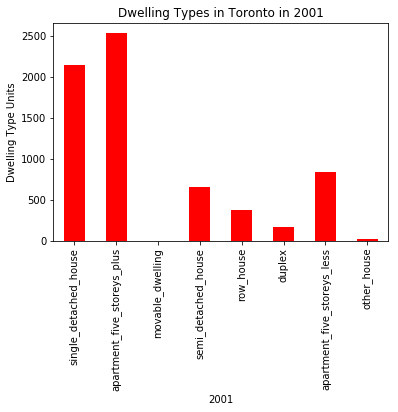

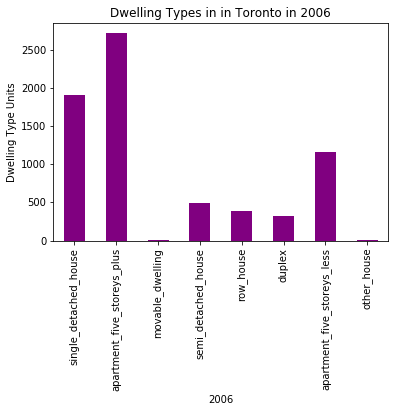

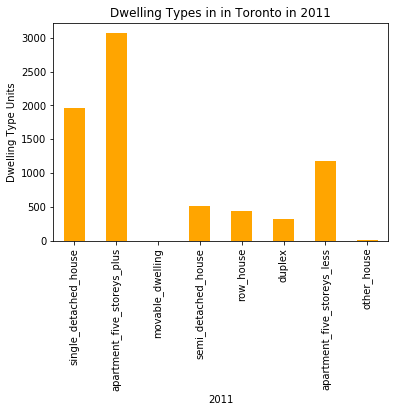

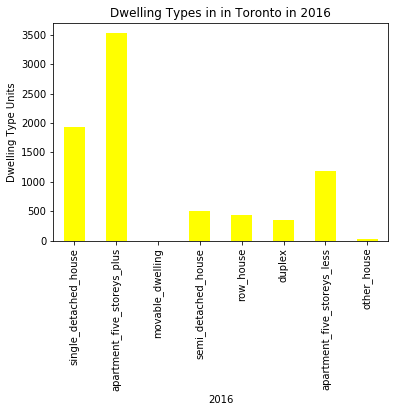

In [58]:
# yearly market analysis content - tab 2

dwelling_2001 = create_bar_chart(grouped_dwellings_df.loc[2001], "Dwelling Types in Toronto in 2001", "2001", "Dwelling Type Units", "red")
dwelling_2006 = create_bar_chart(grouped_dwellings_df.loc[2006], "Dwelling Types in in Toronto in 2006", "2006", "Dwelling Type Units", "purple")
dwelling_2011 = create_bar_chart(grouped_dwellings_df.loc[2011], "Dwelling Types in in Toronto in 2011", "2011", "Dwelling Type Units", "orange")
dwelling_2016 = create_bar_chart(grouped_dwellings_df.loc[2016], "Dwelling Types in in Toronto in 2016", "2016", "Dwelling Type Units", "yellow")

bar_row1 = pn.Row(dwelling_2001)
bar_row1.append(dwelling_2006)

bar_row2 = pn.Row(dwelling_2011)
bar_row2.append(dwelling_2016)

yearly_market_analysis = pn.Column(bar_row1, bar_row2)

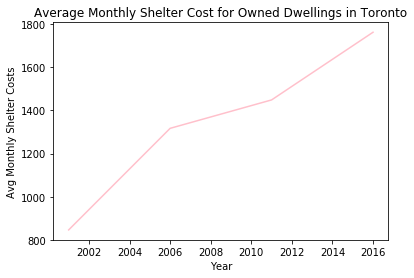

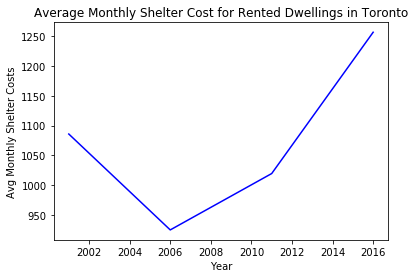

In [59]:
# shelter v house value page content - tabe 3

owned_dwellings = create_line_chart(avg_monthly_shelter_costs["shelter_costs_owned"], 
                                    "Average Monthly Shelter Cost for Owned Dwellings in Toronto", 
                                    "Year", 
                                    "Avg Monthly Shelter Costs", 
                                    "pink")

rented_dwellings = create_line_chart(avg_monthly_shelter_costs["shelter_costs_rented"], 
                                     "Average Monthly Shelter Cost for Rented Dwellings in Toronto", 
                                     "Year", 
                                     "Avg Monthly Shelter Costs",
                                     "blue")

line_row1 = pn.Row(owned_dwellings)
line_row2 = pn.Row(rented_dwellings)

shelter_v_house_value = pn.Column(line_row1, line_row2)

In [60]:
# neighbourhood analysis - tab 4

analysis_row1 = average_value_by_neighbourhood().hvplot.line(
    x="year",
    y="average_house_value",
    xlabel="Year",
    ylabel="Avg House Value",
    groupby = "neighbourhood").opts(yformatter="%.0f")

In [61]:
analysis_row2 = number_dwelling_types().hvplot.bar(
    x="year",
    xlabel="Year",
    ylabel="Dwelling Type Units",
    groupby = "neighbourhood",
    rot=90,
    height= 500
).opts(yformatter="%.0f")

neighbourhood_analysis = pn.Column(analysis_row1, analysis_row2)

In [62]:
# neighbourhood analysis - tab 4

top_10_row1 = top_most_expensive_neighbourhoods().hvplot.bar(
    x="neighbourhood",
    y="average_house_value",
    xlabel="Neighbourhood",
    ylabel="Avg House Value",
    title="Top 10 Expensive Neighbourhoods in Toronto",
    rot=90,
    height= 500,
).opts(yformatter="%.0f")

top_10 = pn.Column(top_10_row1)

In [63]:
# Create the main dashboard

dashboard = pn.Tabs(
    ("Welcome", welcome_column),
    ("Yearly Market Analysis", yearly_market_analysis),
    ("Shelter Costs vs House Value", shelter_v_house_value),
    ("Niehgbourhood Analysis", neighbourhood_analysis),
    ("Top 10 Most Expensive Neighbourhoods", top_10)
)

## Serve the Panel Dashboard

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Plotly(Figure)
    [1] Column
        [0] Row
            [0] Matplotlib(Figure)
            [1] Matplotlib(Figure)
        [1] Row
            [0] Matplotlib(Figure)
            [1] Matplotlib(Figure)
    [2] Column
        [0] Row
            [0] Matplotlib(Figure)
        [1] Row
            [0] Matplotlib(Figure)
    [3] Column
        [0] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
                [1] VSpacer()
        [1] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
                [1] VSpacer()
    [4] Column
        [0] HoloViews(Bars)
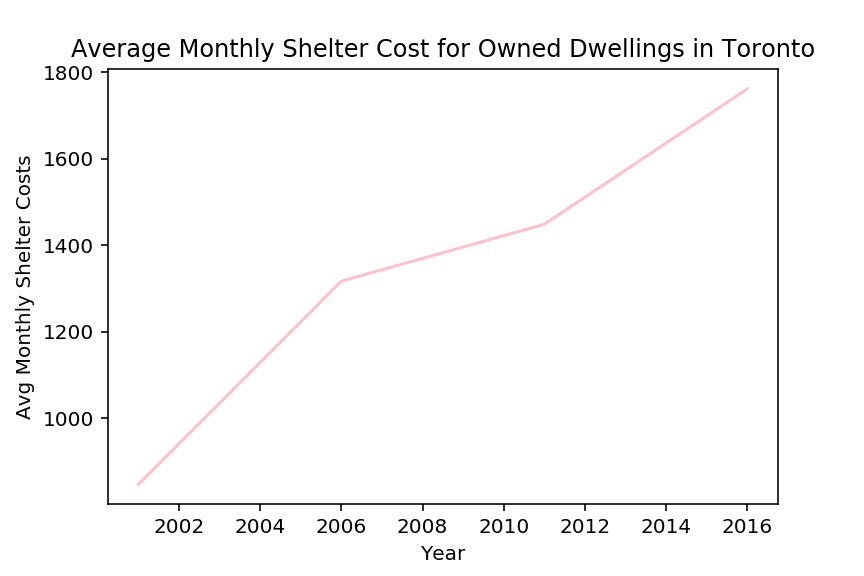
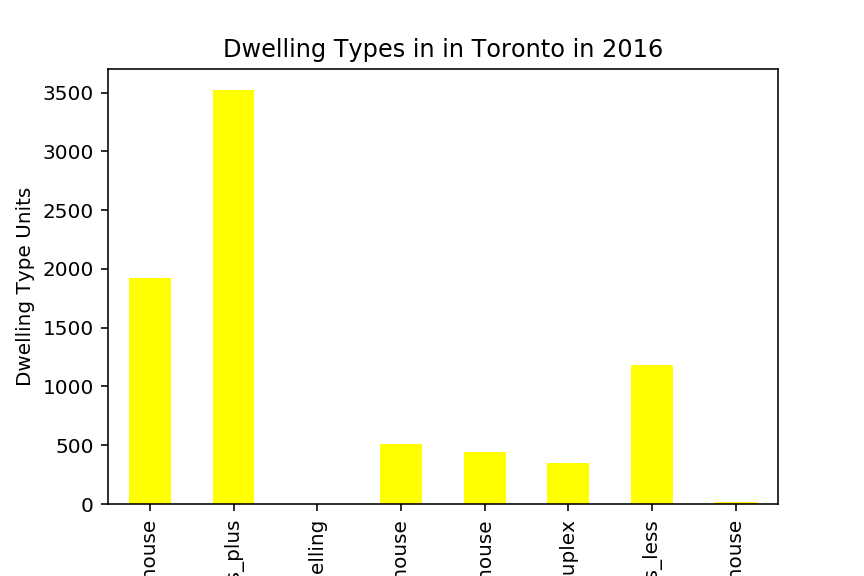
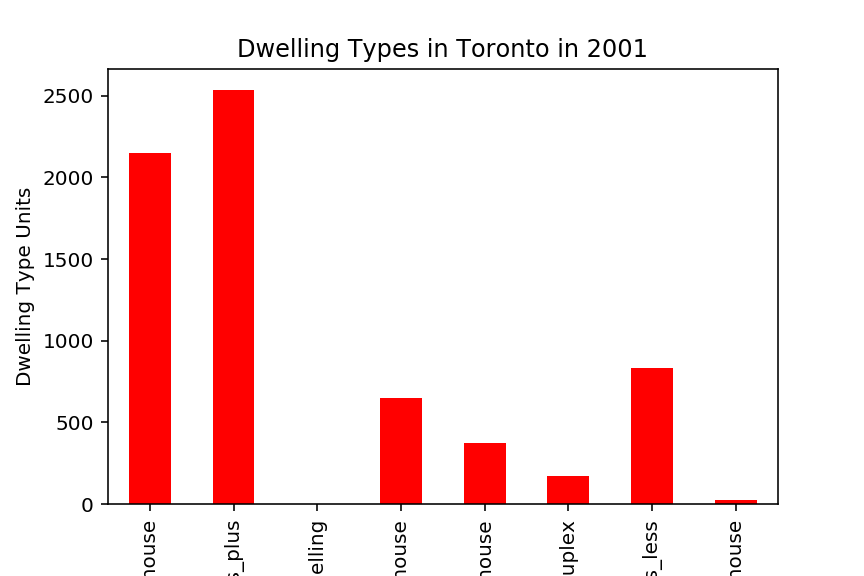
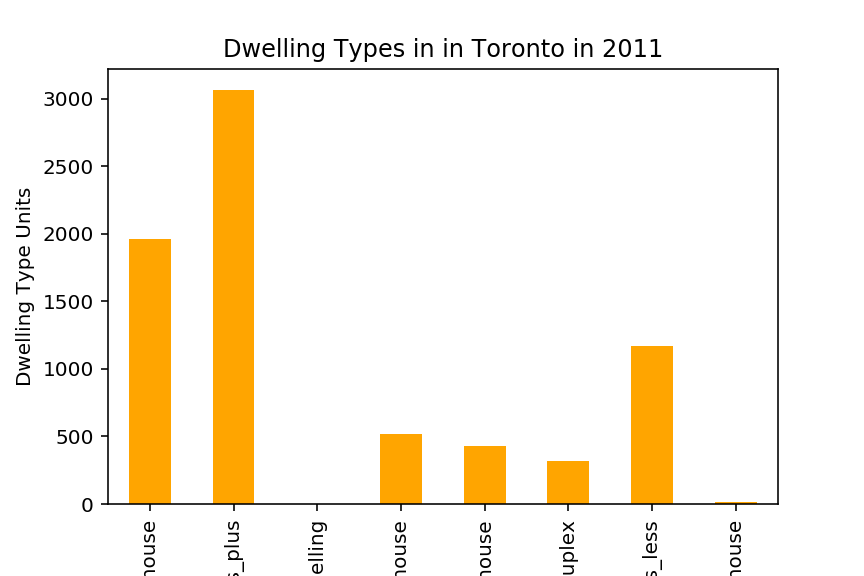
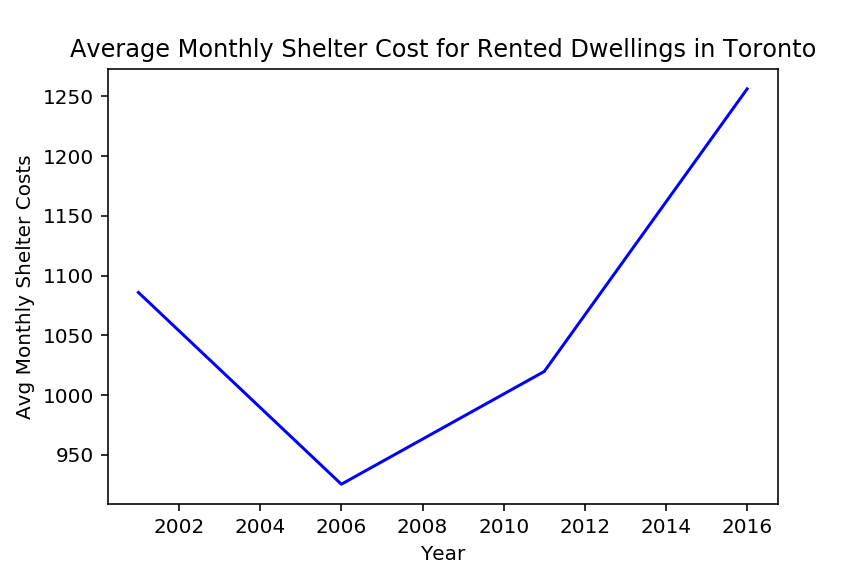
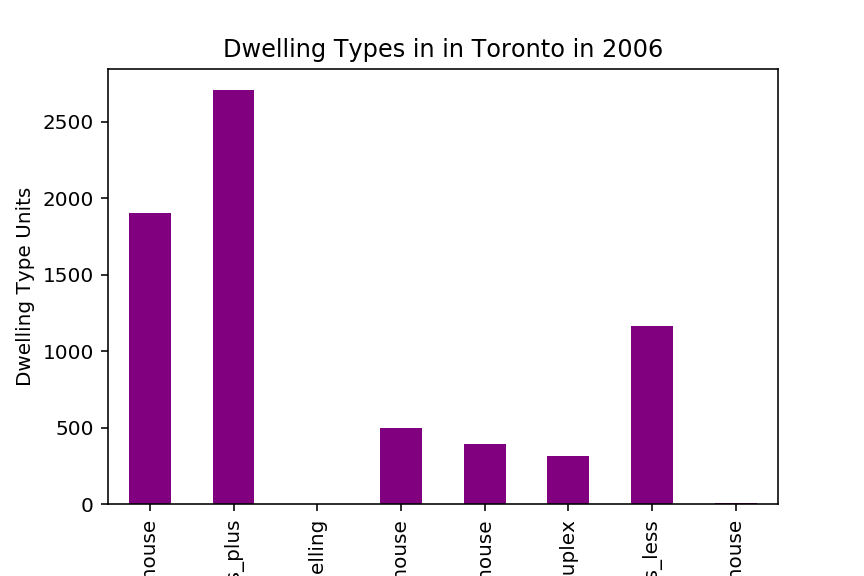

In [64]:
dashboard.servable()

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

In [65]:
# neighbourhood_map().show()

In [66]:
# create_bar_chart(data, title, xlabel, ylabel, color)

In [26]:
# # Bar chart for 2001
# create_bar_chart(df_dwelling_units.loc[2001], "Dwelling Types in Toronto in 2001", "2001", "Dwelling Type Units", "red")


In [27]:
# # Bar chart for 2006
# create_bar_chart(df_dwelling_units.loc[2006], "Dwelling Types in Toronto in 2006", "2006", "Dwelling Type Units", "blue")


In [28]:
# # Bar chart for 2011
# create_bar_chart(df_dwelling_units.loc[2011], "Dwelling Types in Toronto in 2011", "2011", "Dwelling Type Units", "orange")


In [29]:
# # Bar chart for 2016
# create_bar_chart(df_dwelling_units.loc[2016], "Dwelling Types in Toronto in 2016", "2016", "Dwelling Type Units", "magenta")

In [30]:
# create_line_chart(data, title, xlabel, ylabel, color)

# # Line chart for owned dwellings
# create_line_chart(df_avg_costs["shelter_costs_owned"], "Average Monthly Shelter Cost for Owned Dwellings in Toronto", "Year", "Avg Monthly Shelter Costs", "blue")

# # Line chart for rented dwellings
# create_line_chart(df_avg_costs["shelter_costs_rented"], "Average Monthly Shelter Cost for Rented Dwellings in Toronto", "Year", "Avg Monthly Shelter Costs", "orange")

In [31]:
# average_house_value()

In [32]:
# average_value_by_neighbourhood()

In [33]:
# number_dwelling_types()

In [34]:
# average_house_value_snapshot()

In [35]:
# top_most_expensive_neighbourhoods()

In [36]:
# sunburts_cost_analysis()